In [1]:
from textblob import TextBlob
from bson.objectid import ObjectId
from flask import Flask, request
from pymongo import MongoClient
import requests
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity as distance

client = MongoClient("mongodb://localhost:27017/Emotion")
db = client.get_database()

In [2]:
collection1 = db.Message
data1 = pd.DataFrame(list(collection1.find()))
data1.head()

,_id,chat,user,message
0,5e52504394eea8f5601aeeab,5e524dde94eea8f5601aeea7,5e524d6494eea8f5601aee9d,"Buenos días Santi, te nombró nuevo presidente ..."
1,5e52506994eea8f5601aeeac,5e524dde94eea8f5601aeea7,5e524d6c94eea8f5601aee9e,"Hola presidente, será un orgullo hacerme cargo..."
2,5e52508594eea8f5601aeead,5e524dde94eea8f5601aeea7,5e524d6c94eea8f5601aee9e,"Zidane, tienes toda la confianza por parte de ..."
3,5e5250a694eea8f5601aeeae,5e524dde94eea8f5601aeea7,5e524d7294eea8f5601aee9f,"muchas gracias, no tengo ninguna duda de qué l..."
4,5e52510894eea8f5601aeeaf,5e524e0994eea8f5601aeeaa,5e5242c695bf729cab917eb4,"mañana hay partido, hay que ganar"


In [3]:
affinity = data1[['user','message']]
affinity.head()

,user,message
0,5e524d6494eea8f5601aee9d,"Buenos días Santi, te nombró nuevo presidente ..."
1,5e524d6c94eea8f5601aee9e,"Hola presidente, será un orgullo hacerme cargo..."
2,5e524d6c94eea8f5601aee9e,"Zidane, tienes toda la confianza por parte de ..."
3,5e524d7294eea8f5601aee9f,"muchas gracias, no tengo ninguna duda de qué l..."
4,5e5242c695bf729cab917eb4,"mañana hay partido, hay que ganar"


In [4]:
agrupado = affinity.groupby('user').agg(lambda col: ', '.join(col))
agrupado

,message
user,
5e5242c695bf729cab917eb4,"mañana hay partido, hay que ganar, tenemos el ..."
5e5242f095bf729cab917eb6,"ganamos seguro captan, estoy con confianza., v..."
5e524d5c94eea8f5601aee9c,"hay que motivar a los jugadores, ganar es impo..."
5e524d6494eea8f5601aee9d,"Buenos días Santi, te nombró nuevo presidente ..."
5e524d6c94eea8f5601aee9e,"Hola presidente, será un orgullo hacerme cargo..."
5e524d7294eea8f5601aee9f,"muchas gracias, no tengo ninguna duda de qué l..."
5e524d7894eea8f5601aeea0,yo necesito descansar me ha dicho Karim qué ma...
5e524d8b94eea8f5601aeea1,"Marcelo, yo también soy suplente, como siempre..."
5e524d9594eea8f5601aeea2,"acabo de ser padre, me quedo en casa, que yo m..."


In [5]:
convers = agrupado.reset_index()
convers

,user,message
0,5e5242c695bf729cab917eb4,"mañana hay partido, hay que ganar, tenemos el ..."
1,5e5242f095bf729cab917eb6,"ganamos seguro captan, estoy con confianza., v..."
2,5e524d5c94eea8f5601aee9c,"hay que motivar a los jugadores, ganar es impo..."
3,5e524d6494eea8f5601aee9d,"Buenos días Santi, te nombró nuevo presidente ..."
4,5e524d6c94eea8f5601aee9e,"Hola presidente, será un orgullo hacerme cargo..."
5,5e524d7294eea8f5601aee9f,"muchas gracias, no tengo ninguna duda de qué l..."
6,5e524d7894eea8f5601aeea0,yo necesito descansar me ha dicho Karim qué ma...
7,5e524d8b94eea8f5601aeea1,"Marcelo, yo también soy suplente, como siempre..."
8,5e524d9594eea8f5601aeea2,"acabo de ser padre, me quedo en casa, que yo m..."
9,5e524db094eea8f5601aeea3,"Me han regalado unas botas de fútbol ,pero sol..."


In [6]:
toDict = convers.set_index('user').to_dict('dict')
for clave, valor in toDict.items():
    elementos = ", ".join(valor.values())
a = valor

In [7]:
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(a.values())
print(list(count_vectorizer.vocabulary_.keys()))
m = sparse_matrix.todense()
print(m.shape)
print(m[0])

['mañana', 'hay', 'partido', 'que', 'ganar', 'tenemos', 'el', 'mejor', 'equipo', 'del', 'mundo', 'no', 'dudo', 'de', 'vosotros', 'buenas', 'noches', 'descansar', 'tú', 'vete', 'jugar', 'al', 'golf', 'vas', 'somos', 'los', 'mejores', 'ganamos', 'seguro', 'captan', 'estoy', 'con', 'confianza', 'vinicius', 'tiene', 'mucha', 'calidad', 'nos', 'va', 'ayudar', 'goles', 'asistencias', 'yo', 'me', 'ocupo', 'las', 'mujeres', 'llevo', 'fiesta', 'ver', 'si', 'la', 'mete', 'una', 'vez', 'motivar', 'jugadores', 'es', 'importante', 'esperemos', 'haga', 'un', 'buen', 'pero', 'voy', 'quién', 'sale', 'anímate', 'valverde', 'invito', 'karim', 'te', 'juegues', 'van', 'meter', 'en', 'cárcel', 'buenos', 'días', 'santi', 'nombró', 'nuevo', 'presidente', 'club', 'hola', 'será', 'orgullo', 'hacerme', 'cargo', 'quiero', 'estés', 'mi', 'lado', 'haremos', 'real', 'madrid', 'aún', 'más', 'grande', 'zidane', 'tienes', 'toda', 'por', 'parte', 'presidencia', 'ganarlo', 'todo', 'confío', 'mucho', 'ti', 'eres', 'juega

In [8]:
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=a.keys())
display(df)

,acabo,al,alcancéis,alguien,anímate,asistencias,ayudar,aún,botas,buen,...,ver,vete,vez,victorias,vinicius,vosotros,voy,ya,yo,zidane
5e5242c695bf729cab917eb4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5e5242f095bf729cab917eb6,0,0,0,0,0,1,1,0,0,0,...,1,0,1,0,2,0,0,0,2,0
5e524d5c94eea8f5601aee9c,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,2,0
5e524d6494eea8f5601aee9d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5e524d6c94eea8f5601aee9e,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
5e524d7294eea8f5601aee9f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5e524d7894eea8f5601aeea0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5e524d8b94eea8f5601aeea1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5e524d9594eea8f5601aeea2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,1,0
5e524db094eea8f5601aeea3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
similarity_matrix = distance(df,df)
print(similarity_matrix)

[[1.         0.08728716 0.38832158 0.1028689  0.32971986 0.1711842
  0.13801311 0.         0.14580296 0.03742406 0.19304684 0.15430335
  0.05143445]
 [0.08728716 1.         0.24351231 0.         0.19230479 0.11766968
  0.25298221 0.0942809  0.26726124 0.24009802 0.14744196 0.14142136
  0.14142136]
 [0.38832158 0.24351231 1.         0.08830216 0.30875989 0.14694367
  0.23693955 0.08830216 0.25031309 0.06424926 0.11047364 0.17660431
  0.17660431]
 [0.1028689  0.         0.08830216 1.         0.16188098 0.
  0.         0.         0.06299408 0.         0.         0.
  0.22222222]
 [0.32971986 0.19230479 0.30875989 0.16188098 1.         0.10775449
  0.13031167 0.         0.20191135 0.07067143 0.18227439 0.12950478
  0.09712859]
 [0.1711842  0.11766968 0.14694367 0.         0.10775449 1.
  0.12403473 0.         0.05241424 0.06726728 0.         0.
  0.09245003]
 [0.13801311 0.25298221 0.23693955 0.         0.13031167 0.12403473
  1.         0.1490712  0.29580399 0.10846523 0.18650096 0.149071

,5e5242c695bf729cab917eb4,5e5242f095bf729cab917eb6,5e524d5c94eea8f5601aee9c,5e524d6494eea8f5601aee9d,5e524d6c94eea8f5601aee9e,5e524d7294eea8f5601aee9f,5e524d7894eea8f5601aeea0,5e524d8b94eea8f5601aeea1,5e524d9594eea8f5601aeea2,5e524db094eea8f5601aeea3,5e524dba94eea8f5601aeea4,5e524dc594eea8f5601aeea5,5e524dcc94eea8f5601aeea6
5e5242c695bf729cab917eb4,1.000000,0.087287,0.388322,0.102869,0.329720,0.171184,0.138013,0.000000,0.145803,0.037424,0.193047,0.154303,0.051434
5e5242f095bf729cab917eb6,0.087287,1.000000,0.243512,0.000000,0.192305,0.117670,0.252982,0.094281,0.267261,0.240098,0.147442,0.141421,0.141421
5e524d5c94eea8f5601aee9c,0.388322,0.243512,1.000000,0.088302,0.308760,0.146944,0.236940,0.088302,0.250313,0.064249,0.110474,0.176604,0.176604
5e524d6494eea8f5601aee9d,0.102869,0.000000,0.088302,1.000000,0.161881,0.000000,0.000000,0.000000,0.062994,0.000000,0.000000,0.000000,0.222222
5e524d6c94eea8f5601aee9e,0.329720,0.192305,0.308760,0.161881,1.000000,0.107754,0.130312,0.000000,0.201911,0.070671,0.182274,0.129505,0.097129
5e524d7294eea8f5601aee9f,0.171184,0.117670,0.146944,0.000000,0.107754,1.000000,0.124035,0.000000,0.052414,0.067267,0.000000,0.000000,0.092450
5e524d7894eea8f5601aeea0,0.138013,0.252982,0.236940,0.000000,0.130312,0.124035,1.000000,0.149071,0.295804,0.108465,0.186501,0.149071,0.149071
5e524d8b94eea8f5601aeea1,0.000000,0.094281,0.088302,0.000000,0.000000,0.000000,0.149071,1.000000,0.062994,0.000000,0.208514,0.111111,0.000000
5e524d9594eea8f5601aeea2,0.145803,0.267261,0.250313,0.062994,0.201911,0.052414,0.295804,0.062994,1.000000,0.137505,0.078811,0.125988,0.062994
5e524db094eea8f5601aeea3,0.037424,0.240098,0.064249,0.000000,0.070671,0.067267,0.108465,0.000000,0.137505,1.000000,0.303433,0.000000,0.080845


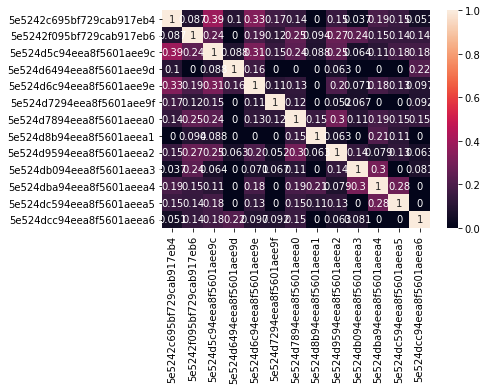

In [10]:
import seaborn as sns
sim_df = pd.DataFrame(similarity_matrix, columns=a.keys(), index=a.keys())
display(sim_df)
sns.heatmap(sim_df,annot=True)

In [11]:
import numpy as np
np.fill_diagonal(sim_df.values, 0) # Remove diagonal max values and set those to 0
sim_df.idxmax()

5e5242c695bf729cab917eb4    5e524d5c94eea8f5601aee9c
5e5242f095bf729cab917eb6    5e524d9594eea8f5601aeea2
5e524d5c94eea8f5601aee9c    5e5242c695bf729cab917eb4
5e524d6494eea8f5601aee9d    5e524dcc94eea8f5601aeea6
5e524d6c94eea8f5601aee9e    5e5242c695bf729cab917eb4
5e524d7294eea8f5601aee9f    5e5242c695bf729cab917eb4
5e524d7894eea8f5601aeea0    5e524d9594eea8f5601aeea2
5e524d8b94eea8f5601aeea1    5e524dba94eea8f5601aeea4
5e524d9594eea8f5601aeea2    5e524d7894eea8f5601aeea0
5e524db094eea8f5601aeea3    5e524dba94eea8f5601aeea4
5e524dba94eea8f5601aeea4    5e524db094eea8f5601aeea3
5e524dc594eea8f5601aeea5    5e524dba94eea8f5601aeea4
5e524dcc94eea8f5601aeea6    5e524d6494eea8f5601aee9d
dtype: object

In [12]:
sim_df

,5e5242c695bf729cab917eb4,5e5242f095bf729cab917eb6,5e524d5c94eea8f5601aee9c,5e524d6494eea8f5601aee9d,5e524d6c94eea8f5601aee9e,5e524d7294eea8f5601aee9f,5e524d7894eea8f5601aeea0,5e524d8b94eea8f5601aeea1,5e524d9594eea8f5601aeea2,5e524db094eea8f5601aeea3,5e524dba94eea8f5601aeea4,5e524dc594eea8f5601aeea5,5e524dcc94eea8f5601aeea6
5e5242c695bf729cab917eb4,0.000000,0.087287,0.388322,0.102869,0.329720,0.171184,0.138013,0.000000,0.145803,0.037424,0.193047,0.154303,0.051434
5e5242f095bf729cab917eb6,0.087287,0.000000,0.243512,0.000000,0.192305,0.117670,0.252982,0.094281,0.267261,0.240098,0.147442,0.141421,0.141421
5e524d5c94eea8f5601aee9c,0.388322,0.243512,0.000000,0.088302,0.308760,0.146944,0.236940,0.088302,0.250313,0.064249,0.110474,0.176604,0.176604
5e524d6494eea8f5601aee9d,0.102869,0.000000,0.088302,0.000000,0.161881,0.000000,0.000000,0.000000,0.062994,0.000000,0.000000,0.000000,0.222222
5e524d6c94eea8f5601aee9e,0.329720,0.192305,0.308760,0.161881,0.000000,0.107754,0.130312,0.000000,0.201911,0.070671,0.182274,0.129505,0.097129
5e524d7294eea8f5601aee9f,0.171184,0.117670,0.146944,0.000000,0.107754,0.000000,0.124035,0.000000,0.052414,0.067267,0.000000,0.000000,0.092450
5e524d7894eea8f5601aeea0,0.138013,0.252982,0.236940,0.000000,0.130312,0.124035,0.000000,0.149071,0.295804,0.108465,0.186501,0.149071,0.149071
5e524d8b94eea8f5601aeea1,0.000000,0.094281,0.088302,0.000000,0.000000,0.000000,0.149071,0.000000,0.062994,0.000000,0.208514,0.111111,0.000000
5e524d9594eea8f5601aeea2,0.145803,0.267261,0.250313,0.062994,0.201911,0.052414,0.295804,0.062994,0.000000,0.137505,0.078811,0.125988,0.062994
5e524db094eea8f5601aeea3,0.037424,0.240098,0.064249,0.000000,0.070671,0.067267,0.108465,0.000000,0.137505,0.000000,0.303433,0.000000,0.080845


In [17]:
a = sim_df[ObjectId('5e5242c695bf729cab917eb4')]
a = pd.DataFrame(a)
similares = a.sort_values([ObjectId('5e5242c695bf729cab917eb4')], ascending=False).head(3)
similares = similares.reset_index().rename(columns={'index':'Usuarios'})
a = list(similares.Usuarios)
a

[ObjectId('5e524d5c94eea8f5601aee9c'),
 ObjectId('5e524d6c94eea8f5601aee9e'),
 ObjectId('5e524dba94eea8f5601aeea4')]

In [18]:
recomendados = []
def getname(numerito):
    for i in numerito:
        print(i)
        query = {'_id':ObjectId(i)}
        coll_user = db['User']
        nombre = list(coll_user.find(query,{'_id': 0, 'user': 1}))
        recomendados.append(nombre)
    return recomendados

In [19]:
finalName = getname(a)
print(finalName)

5e524d5c94eea8f5601aee9c
5e524d6c94eea8f5601aee9e
5e524dba94eea8f5601aeea4
[[{'user': 'Marcelo'}], [{'user': 'Santi Bermejo'}], [{'user': 'Gareth Bale'}]]
